In [187]:
#-*- coding:utf8-*-
%matplotlib inline

from __future__ import absolute_import, division, print_function, unicode_literals

from IPython.display import Image

import numpy as np

import uncertainties as unc
from uncertainties import unumpy as unp
from uncertainties.unumpy import std_devs as stds #TODO
from uncertainties.unumpy import nominal_values as noms #TODO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 
import matplotlib.transforms as mtrans

import seaborn as sns
sns.set(context="paper",font_scale=1.4)
sns.set_context(rc={'lines.markeredgewidth': 0.1})
plot_colors = sns.color_palette()


import scipy as sp
import scipy.constants as const

import sympy as sym

import pandas as pd


from aputils.latextables.tables import Table

import sys

# Fehlerfortpflanzung beim Mitteln
umean = unc.wrap(np.mean)

#Laden des Latex fonts 
plt.rcParams['text.latex.preamble']=["\\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

#Größe der Achsenbeschriftung
axis_font = {'size':'14'}

# Pfade
path_graphics = "../Grafiken/"
path_table = "../Tabellen/"
path_data = "../Messdaten/"
path_results = "../Ergebnisse/"

/home/luckyjosh/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/luckyjosh/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Funktionen
# Achsenbeschriftungen
def axis_label(label,sym=None,unit=None):
    if sym == None:
        return lable
    elif unit == None:
        return r"".join([label," ${s}$".format(s=sym)])
    else:
        return r"".join([label," ${s}/\mathrm{{{u}}}$".format(s=sym,u=unit)])

# Achsenskalierung
def axis_scale(factor, axis="x"):
    if axis == "x":
        plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: x * factor))
    elif axis == "y":
        plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: x * factor))
    else:
        print("Wrong axis name given! Only x and y are allowed!")

def siunitx_ticklabels(ax=None, locale="DE", xaxis=True, yaxis=True,
                       round_precision=2, round_mode="places", scale_x=None, scale_y=None):
    """
    This function uses siunitx to create the ticklabels
    Main reason is for adjusting the decimal marker properly.
    The function takes 4 arguments:
        ax=None     the matplotlib axes to operate on
                    if set to None (Standard) this will be the current axes
        locale="DE" The locale parameter for siunitx, one of
                    "UK", "US", "DE", "FR" oder "ZA"
        xaxis=True  Boolean, if True the labels for the xaxis are set
        yaxis=True  Boolean, if True the labels for the yaxis are set
        round_precision=2 Number of places or figures after rounding
        round_mode="places" Rounds to round_precision many decimal places,
                  "figures" Rounds to round_precision many significant figures
                  
    """

    if ax is None:
        ax = plt.gca()

    if scale_x == None:
        scale_x = 1
    if scale_y == None:
        scale_y = 1
        
        
    if xaxis is True:
        xticks = ax.get_xticks()
        print(xticks)
        xlabels = [r"$\num[locale={},round-mode={},round-precision={}]{{{}}}$".format(
                   locale, round_mode,round_precision, tick*scale_x) for tick in xticks]
        #print(xlabels)
        ax.set_xticklabels(xlabels)

    if yaxis is True:
        yticks = ax.get_yticks()
        ylabels = [r"$\num[locale={},round-mode={},round-precision={}]{{{}}}$".format(
                   locale, round_mode,round_precision, tick*scale_y) for tick in yticks]
        #print(ylabels)
        ax.set_yticklabels(ylabels)    
        
# Fit Funktionen
def fit_errors(popt,pcov):
    errors = np.sqrt(np.diag(pcov))
    param_err = unp.uarray(popt,errors)
    return param_err
    
def print_errors(array,description=None):
    if description and len(description)==len(array):
        maxlen = max(map(len,description))
        lens = map(len,description)
        for entry,Len,desc in zip(array,lens,description):
            #print(desc," "*(maxlen-Len),entry.nominal_value,"+/-",entry.std_dev)
            print(desc," "*(maxlen-Len),"{:.1uS}".format(entry))
    else:
        for i,entry in enumerate(array):
            print(entry.nominal_value,"+/-",entry.std_dev)
    print("")
    
def _print_result(result,sym,unit=None,file=sys.stdout):
    if unit == None:
        print("{} = ".format(sym),"\\num{{{:.1uS}}}".format(result),file=file)
    else:
        print("{} = ".format(sym),"\\SI{{{:.1uS}}}{{{}}}".format(result,unit),file=file)
        
def print_result(result, sym, unit=None, file=None, mode="w"):
    if file == None:
        _print_result(result, sym, unit=unit)
    else:
        with open(path_results+file, mode) as File:
            _print_result(result, sym, unit=unit, file=File)

In [3]:
def lighten_color(color_rgb, amount):
    def calc_new(value,amount):
        new_value = value + amount
        if new_value >1:
            new_value = 1
        elif new_value < 0:
            new_value = 0
        return new_value
    
    new_color = tuple([calc_new(val,amount) for val in color_rgb])
    return new_color
        
    

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.6980392156862745), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


/home/luckyjosh/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


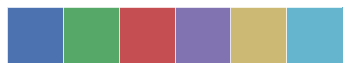

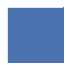

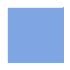

In [4]:
print(sns.color_palette())
sns.palplot(sns.color_palette())
sns.palplot([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)])
sns.palplot([lighten_color((0.2980392156862745, 0.4470588235294118, 0.6901960784313725),0.2)])

## Auswertung Resonanzstellen

In [259]:
def magnetic_field_coil(N,R,I):
    return const.mu_0 * (8*I*N/(np.sqrt(125)*R))

In [260]:
# Spulenparameter N:Windungszahl, R:Radius
coil_sweep = {"N":11, "R":0.1639}
coil_horizontal = {"N":154,"R":0.1579}
coil_verttical = {"N":20,"R":0.11735}

magnetic_field_frequence_factor = 4*np.pi*(const.electron_mass/const.e)

In [261]:
# Resonanzstellen für die beiden Isotope P1=Rb87, P2=Rb85
resonance_positions = pd.read_csv(path_data+"Resonanzsstellen.csv")

In [262]:
resonance_positions.head(5)

,Frequenz kHz,SweepStrom P1 0.1V,HorizontalStrom P1 0.3V,SweepStrom P2 0.1V,HorizontalStrom P2 0.3V
0,100,5.61,0.00,6.80,0.00
1,200,5.79,0.05,8.14,0.05
2,300,2.81,0.17,6.39,0.17
3,400,1.74,0.25,6.49,0.25
4,500,1.99,0.30,7.87,0.30


In [263]:
# Fehlerbehaftete Größen
resonance_positions["SweepStrom P1 0.1V"] = unp.uarray(resonance_positions["SweepStrom P1 0.1V"],[0.01])
resonance_positions["HorizontalStrom P1 0.3V"] = unp.uarray(resonance_positions["HorizontalStrom P1 0.3V"],[0.01])
resonance_positions["SweepStrom P2 0.1V"] = unp.uarray(resonance_positions["SweepStrom P2 0.1V"],[0.01])
resonance_positions["HorizontalStrom P2 0.3V"] = unp.uarray(resonance_positions["HorizontalStrom P2 0.3V"],[0.01])

In [264]:
# GesamtHorizontalFeld an den Resonanzstellen beider Isotope
resonance_positions["Magnetfeld P1"] = (magnetic_field_coil(coil_sweep["N"],coil_sweep["R"],0.1 * resonance_positions["SweepStrom P1 0.1V"]) + 
                                         magnetic_field_coil(coil_horizontal["N"],coil_horizontal["R"],0.3 * resonance_positions["HorizontalStrom P1 0.3V"]))
resonance_positions["Magnetfeld P2"] = (magnetic_field_coil(coil_sweep["N"],coil_sweep["R"],0.1 * resonance_positions["SweepStrom P2 0.1V"]) + 
                                         magnetic_field_coil(coil_horizontal["N"],coil_horizontal["R"],0.3 * resonance_positions["HorizontalStrom P2 0.3V"]))

In [265]:
resonance_positions.head(5)

,Frequenz kHz,SweepStrom P1 0.1V,HorizontalStrom P1 0.3V,SweepStrom P2 0.1V,HorizontalStrom P2 0.3V,Magnetfeld P1,Magnetfeld P2
0,100,5.610+/-0.010,0.000+/-0.010,6.800+/-0.010,0.000+/-0.010,(3.39+/-0.26)e-05,(4.10+/-0.26)e-05
1,200,5.790+/-0.010,0.050+/-0.010,8.140+/-0.010,0.050+/-0.010,(4.81+/-0.26)e-05,(6.23+/-0.26)e-05
2,300,2.810+/-0.010,0.170+/-0.010,6.390+/-0.010,0.170+/-0.010,(6.17+/-0.26)e-05,(8.33+/-0.26)e-05
3,400,1.740+/-0.010,0.250+/-0.010,6.490+/-0.010,0.250+/-0.010,(7.63+/-0.26)e-05,0.0001049+/-0.0000026
4,500,1.990+/-0.010,0.300+/-0.010,7.870+/-0.010,0.300+/-0.010,(9.09+/-0.26)e-05,0.0001264+/-0.0000026


In [266]:
#Fit der Messwerte
linear_fct = lambda x,a,b: a*x + b 

popt, pcov = sp.optimize.curve_fit(linear_fct,resonance_positions["Frequenz kHz"]*1000,
                                   noms(resonance_positions["Magnetfeld P1"]))
fit_parameter_P1 = fit_errors(popt,pcov)

popt, pcov = sp.optimize.curve_fit(linear_fct,resonance_positions["Frequenz kHz"]*1000,
                                   noms(resonance_positions["Magnetfeld P2"]))
fit_parameter_P2 = fit_errors(popt,pcov)


In [267]:
print("Fit Parameter Rb87")
print_errors(fit_parameter_P1,description=("a","b"))

print("Fit Parameter Rb85")
print_errors(fit_parameter_P2,description=("a","b"))


print_result(fit_parameter_P1[0],sym="a",unit="\\tesla\\per\\hertz",file="Fitparameter_a_Rubidium_87.tex")
print_result(fit_parameter_P1[1],sym="b",unit="\\tesla",file="Fitparameter_b_Rubidium_87.tex")
print_result(fit_parameter_P2[0]/1000,sym="a",unit="\\tesla\\per\\hertz",file="Fitparameter_a_Rubidium_85.tex")
print_result(fit_parameter_P2[1],sym="b",unit="\\tesla",file="Fitparameter_b_Rubidium_85.tex")

Fit Parameter Rb87
a  1.434(5)e-10
b  1.92(3)e-05

Fit Parameter Rb85
a  2.164(9)e-10
b  1.88(5)e-05



In [268]:
# Lande-Faktoren
lande_factor_P1 = magnetic_field_frequence_factor/fit_parameter_P1[0]
lande_factor_P2 = magnetic_field_frequence_factor/fit_parameter_P2[0]

print("Lande Fakor P1: Rb87")
print_errors((lande_factor_P1,),description=("g_F",))

print("Lande Faktor P2: Rb85")
print_errors((lande_factor_P2,), description=("g_F",))


print_result(lande_factor_P1,sym="g_{{}^{87}\!\\mathrm{Rb}}",file="Lande_Faktor_Rubidium_87.tex")
print_result(lande_factor_P2,sym="g_{{}^{85}\!\\mathrm{Rb}}",file="Lande_Faktor_Rubidium_85.tex")

Lande Fakor P1: Rb87
g_F  0.498(2)

Lande Faktor P2: Rb85
g_F  0.330(1)



### Berechnung des Kernspins
Das gepumpte Niveau hat die Quantenzahlen $S=\frac{1}{2}$ (ein Elektron) $L=0$ (Grundzustand), woraus für den gesamt Drehimpuls des Elektrons $J=\frac{1}{2}$ folgt, da $J = (L+S) ... |L-S|$. 
Mit
$$g_J =  \frac{3.0023 J(J+1) + 1.0023[S(S+1)-L(L+1)]}{2J(J+1)}$$
ergibt sich $g_J = 2.0023$.

Für die Quantanzahl $F$ gilt analog zu $J$ , $F = (I+J) ... |I-J|$. Hier ist $F = (I+\frac{1}{2})$, da nur für das 
Niveau mit der höchsten Quantenzahl $M_F$ kein $\Delta M_F = +1$ Übergang existiert und so nur dieses "voll"gepumpt werden kann. Aus
$$g_F = g_J \frac{F(F+1) + J(J+1) - I(I+1)}{2F(F+1)}$$
folgt entsprechend die Gleichung für den Kernspin $I$:
$$ I = -1+\frac{g_J}{4g_F}+ \sqrt{(1-\frac{g_J}{4g_F})^2 - \frac{3}{4}(1-\frac{g_J}{g_F})} $$

In [269]:
def nuclear_spin(gf,gj=2.0023):
    return -1+(gj/(4*gf))+ np.sqrt((1-(gj/(4*gf)))**2 - (3/4)*(1-(gj/gf)))
nuclear_spin = unc.wrap(nuclear_spin)

In [270]:
nuclear_spin_P1 = nuclear_spin(lande_factor_P1)
nuclear_spin_P2 = nuclear_spin(lande_factor_P2)

print("Kernspin P1: Rb87")
print_errors((nuclear_spin_P1,),description=("I",))

print("Kernspin P2: Rb85")
print_errors((nuclear_spin_P2,), description=("I",))


print_result(nuclear_spin_P1,sym="I_{{}^{87}\!\\mathrm{Rb}}",file="Kernspin_Rubidium_87.tex")
print_result(nuclear_spin_P2,sym="I_{{}^{85}\!\\mathrm{Rb}}",file="Kernspin_Rubidium_85.tex")

Kernspin P1: Rb87
I  1.509(8)

Kernspin P2: Rb85
I  2.53(1)



In [271]:
# Erdmagnetfeld
magnetic_field_earth_mean = umean([fit_parameter_P1[1],fit_parameter_P2[1]])
print_errors((magnetic_field_earth_mean,),description=("B_E",))

print_result(magnetic_field_earth_mean,sym="B_{\\mathrm{Erde},\\mathrm{hor}}",file="Erdmagnetfeld_Horizontal.tex")

B_E  1.90(3)e-05



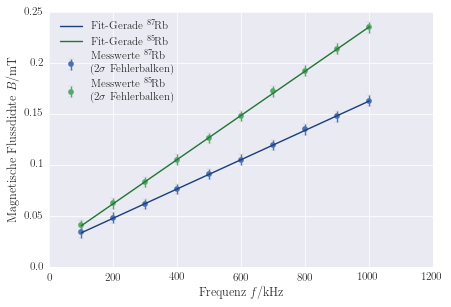

In [272]:
F = np.linspace(100,1000,1e06)


fig, ax = plt.subplots()
ax.set_xlim(0,1200)
ax.set_xlabel(axis_label("Frequenz",sym="f",unit="kHz"))
ax.set_ylabel(axis_label("Magnetische Flussdichte",sym="B",unit="mT"))
axis_scale(1e03,axis="y")

line_P1 = ax.errorbar(resonance_positions["Frequenz kHz"], noms(resonance_positions["Magnetfeld P1"]),
         yerr=2*stds(resonance_positions["Magnetfeld P1"]), label="Messwerte ${}^{87}\!$Rb \n ($2\sigma$ Fehlerbalken)",
                      color=plot_colors[0], marker="o", mec=plot_colors[0], linestyle="")
line_P2 = ax.errorbar(resonance_positions["Frequenz kHz"], noms(resonance_positions["Magnetfeld P2"]),
         yerr=2*stds(resonance_positions["Magnetfeld P2"]), label="Messwerte ${}^{85}\!$Rb \n ($2\sigma$ Fehlerbalken)",
                      color=plot_colors[1],marker="o", mec=plot_colors[1], linestyle="")


ax.plot(F,linear_fct(F*1e3,noms(fit_parameter_P1[0]),noms(fit_parameter_P1[1])),
        label="Fit-Gerade ${}^{87}\!$Rb",color=lighten_color(line_P1[0].get_color(),-0.2))
ax.plot(F,linear_fct(F*1e3,noms(fit_parameter_P2[0]),noms(fit_parameter_P2[1])),
        label="Fit-Gerade ${}^{85}\!$Rb",color=lighten_color(line_P2[0].get_color(),-0.2))
ax.legend(loc="upper left")
fig.tight_layout()
fig.savefig(path_graphics+"Resonanzstellen.pdf")

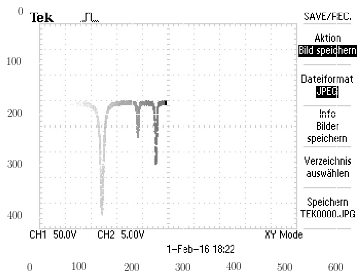

In [220]:
from scipy import ndimage
signal_image=plt.imread(path_graphics+"Signalbild_RF100kHz.JPG")
signal_image=ndimage.rotate(signal_image,90)
plt.imshow(signal_image)



Durch ausmessen der Aplituden erhält man das Verhältnis von P1 zu P2: $R = \frac{4}{7}$
Dieses Verhältnis muss dem Verhältnis des Isotopen Anteils von Rb85 $p_2$ & Rb87 $p_1$ entsprechen.
$R = \frac{p_1}{p_2}$. Daraus folgt mit $p_1 + p_2 = 1$ der Anteil $p_1 = \frac{R}{1+R}$.

In [221]:
def isotope_ratio(R):
    p1 = R/(1+R)
    return p1, 1-p1

In [232]:
height_P1 = unc.ufloat(72,2)
height_P2 = unc.ufloat(126,2)

ratio = height_P1/height_P2 
fraction_P1, fraction_P2 = isotope_ratio(ratio)

print("Anteil von P1: Rb87")
print(fraction_P1)
print("\nAnteil von P2: Rb85")
print(fraction_P2)

print_result(fraction_P1*100,sym="P_{{}^{87}\!\\mathrm{Rb}}",unit="\\percent",file="Anteil_Rubidium_87.tex")
print_result(fraction_P2*100,sym="P_{{}^{85}\!\\mathrm{Rb}}",unit="\\percent",file="Anteil_Rubidium_85.tex")

Anteil von P1: Rb87
0.364+/-0.007

Anteil von P2: Rb85
0.636+/-0.007


## Transienten Effekt

In [273]:
period_lenghts = pd.read_csv(path_data+"Periodendauern.csv")
period_lenghts.columns

Index(['RFSpannung V', 'Zeitdifferenz P1 ms', 'Perioden P1',
       'Zeitdifferenz P2 ms', 'Perioden P2'],
      dtype='object')

In [274]:
period_lenghts.head(1)

,RFSpannung V,Zeitdifferenz P1 ms,Perioden P1,Zeitdifferenz P2 ms,Perioden P2
0,1,9,3,0.96,1


In [275]:
period_lenghts["Zeitdifferenz P1 ms"] = unp.uarray(period_lenghts["Zeitdifferenz P1 ms"],[0.1])
period_lenghts["Zeitdifferenz P2 ms"] = unp.uarray(period_lenghts["Zeitdifferenz P2 ms"],[0.1])
period_lenghts["Perioden P1"] = unp.uarray(period_lenghts["Perioden P1"],np.sqrt(period_lenghts["Perioden P1"]))
period_lenghts["Perioden P2"] = unp.uarray(period_lenghts["Perioden P2"],np.sqrt(period_lenghts["Perioden P2"]))

In [276]:
period_lenghts.head(1)

,RFSpannung V,Zeitdifferenz P1 ms,Perioden P1,Zeitdifferenz P2 ms,Perioden P2
0,1,9.00+/-0.10,3.0+/-1.7,0.96+/-0.10,1.0+/-1.0


In [277]:
period_lenghts["Periodendauer P1"] = period_lenghts["Zeitdifferenz P1 ms"]/period_lenghts["Perioden P1"]
period_lenghts["Periodendauer P2"] = period_lenghts["Zeitdifferenz P2 ms"]/period_lenghts["Perioden P2"]

In [278]:
period_lenghts.head()

,RFSpannung V,Zeitdifferenz P1 ms,Perioden P1,Zeitdifferenz P2 ms,Perioden P2,Periodendauer P1,Periodendauer P2
0,1,9.00+/-0.10,3.0+/-1.7,0.96+/-0.10,1.0+/-1.0,3.0+/-1.7,1.0+/-1.0
1,2,6.40+/-0.10,4.0+/-2.0,2.52+/-0.10,2.0+/-1.4,1.6+/-0.8,1.3+/-0.9
2,3,6.40+/-0.10,6.0+/-2.4,4.28+/-0.10,4.0+/-2.0,1.1+/-0.4,1.1+/-0.5
3,4,5.00+/-0.10,7.0+/-2.6,2.04+/-0.10,3.0+/-1.7,0.71+/-0.27,0.7+/-0.4
4,5,5.20+/-0.10,8.0+/-2.8,4.52+/-0.10,7.0+/-2.6,0.65+/-0.23,0.65+/-0.24


In [309]:
#Fit der Messwerte
hyperbolic_fct = lambda x,a,b,c: a + b/(x-c) 

popt, pcov = sp.optimize.curve_fit(hyperbolic_fct, period_lenghts["RFSpannung V"],
                                   noms(period_lenghts["Periodendauer P1"]),p0=(0.1,1,0))#,sigma=noms(period_lenghts["Periodendauer P1"]))
fit_parameter_P1 = fit_errors(popt,pcov)

popt, pcov = sp.optimize.curve_fit(hyperbolic_fct, period_lenghts["RFSpannung V"],
                                   noms(period_lenghts["Periodendauer P2"]),p0=(0.1,1,0))#,sigma=noms(period_lenghts["Periodendauer P2"]))
fit_parameter_P2 = fit_errors(popt,pcov)


popt, pcov = sp.optimize.curve_fit(hyperbolic_fct, period_lenghts["RFSpannung V"][1:],
                                   noms(period_lenghts["Periodendauer P2"][1:]),p0=(0.1,1,0))#,sigma=noms(period_lenghts["Periodendauer P2"][1:]))
fit_parameter_leftout_P2 = fit_errors(popt,pcov)


In [321]:
print("Fit Parameter Rb87")
print_errors(fit_parameter_P1,description=("a","b","c"))

print("Fit Parameter Rb85")
print_errors(fit_parameter_P2,description=("a","b","c"))

print("Fit Parameter Rb85")
print_errors(fit_parameter_leftout_P2,description=("a","b","c"))

print_result(fit_parameter_P1[0]/1000,sym="a_{{}^{87}\\!\\mathrm{Rb}}",unit="\\second",file="Rubidium_87_Fit_2_a.tex")
print_result(fit_parameter_P1[1]/1000,sym="b_{{}^{87}\\!\\mathrm{Rb}}",unit="\\volt\\second",file="Rubidium_87_Fit_2_b.tex")
print_result(fit_parameter_P1[2],sym="c_{{}^{87}\\!\\mathrm{Rb}}",unit="\\volt",file="Rubidium_87_Fit_2_c.tex")

print_result(fit_parameter_P2[0]/1000,sym="a_{{}^{85}\\!\\mathrm{Rb}}",unit="\\second",file="Rubidium_85_Fit_2_a.tex")
print_result(fit_parameter_P2[1]/1000,sym="b_{{}^{85}\\!\\mathrm{Rb}}",unit="\\volt\\second",file="Rubidium_85_Fit_2_b.tex")
print_result(fit_parameter_P2[2],sym="c_{{}^{85}\\!\\mathrm{Rb}}",unit="\\volt",file="Rubidium_85_Fit_2_c.tex")

print_result(fit_parameter_leftout_P2[0]/1000,sym="a^{\\prime}_{{}^{85}\\!\\mathrm{Rb}}",unit="\\second",file="Rubidium_85_Fit_2_Ausgelassen_a.tex")
print_result(fit_parameter_leftout_P2[1]/1000,sym="b^{\\prime}_{{}^{85}\\!\\mathrm{Rb}}",unit="\\volt\\second",file="Rubidium_85_Fit_2_Ausgelassen_b.tex")
print_result(fit_parameter_leftout_P2[2],sym="c^{\\prime}_{{}^{85}\\!\\mathrm{Rb}}",unit="\\volt",file="Rubidium_85_Fit_2_Ausgelassen_c.tex")

Fit Parameter Rb87
a  -0.17(6)
b  4.0(4)
c  -0.3(1)

Fit Parameter Rb85
a  -2.5(5.7)
b  0.9(3.4)e+02
c  -2.4(5.3)e+01

Fit Parameter Rb85
a  -0.2(2)
b  5.7(2.3)
c  -1.8(1.1)



In [322]:
ratio_b = fit_parameter_P2[1]/fit_parameter_P1[1]
ratio_b_leftout = fit_parameter_leftout_P2[1]/fit_parameter_P1[1]


print("Verhältnis der Parameter b")
print_errors((ratio_b,),description=("r",))

print("Verhältnis der Parameter b Ausgelassen")
print_errors((ratio_b_leftout,),description=("r",))

print_result(ratio_b,sym="\frac{b_{{}^{85}\\!\\mathrm{Rb}}}{b_{}^{87}\!\\mathrm{Rb}}",file="Verhälnis_Fit_2_b.tex")
print_result(ratio_b_leftout,sym="\frac{b^{\\prime}_{{}^{85}\\!\\mathrm{Rb}}}{b_{}^{87}\!\\mathrm{Rb}}",file="Verhälnis_Fit_2_Ausgelassen_b.tex")

Verhältnis der Parameter b
r  2.3(8.5)e+01

Verhältnis der Parameter b Ausgelassen
r  1.4(6)



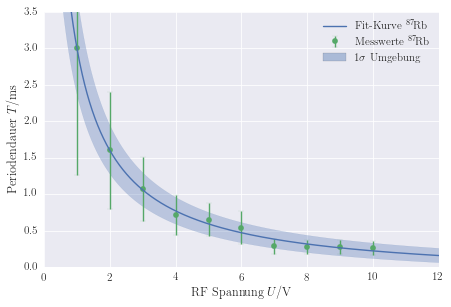

In [311]:
U = np.linspace(0,12,1e03)
T_fit = hyperbolic_fct(U,noms(fit_parameter_P1[0]),noms(fit_parameter_P1[1]),noms(fit_parameter_P1[2]))
T_fit_upper = hyperbolic_fct(U,noms(fit_parameter_P1[0])+stds(fit_parameter_P1[0]),
                             noms(fit_parameter_P1[1])+stds(fit_parameter_P1[1]),
                             noms(fit_parameter_P1[2])+stds(fit_parameter_P1[2]))
T_fit_lower = hyperbolic_fct(U,noms(fit_parameter_P1[0])-stds(fit_parameter_P1[0]),
                             noms(fit_parameter_P1[1])-stds(fit_parameter_P1[1]),
                             noms(fit_parameter_P1[2])-stds(fit_parameter_P1[2]))


fig,ax = plt.subplots()
ax.set_xlim(0,12)
ax.set_ylim(0,3.5)
ax.set_xlabel(axis_label("RF Spannung",sym="U",unit="V"))
ax.set_ylabel(axis_label("Periodendauer",sym="T",unit="ms"))

line_P1 = ax.errorbar(period_lenghts["RFSpannung V"],noms(period_lenghts["Periodendauer P1"]),
            yerr = stds(period_lenghts["Periodendauer P1"]),label="Messwerte ${}^{87}\!$Rb ",
            color=plot_colors[1], marker="o", mec=plot_colors[1], linestyle="")

ax.plot(U,T_fit,label="Fit-Kurve ${}^{87}\!$Rb",color=plot_colors[0])
sigma = ax.fill_between(U,T_fit_upper,T_fit_lower,color=plot_colors[0],alpha=0.3)
ax.bar(0,0,width=0,color=sigma.get_facecolor()[0][:-1],edgecolor="",label=r"1$\sigma$ Umgebung",alpha=0.4)


ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig(path_graphics+"Transienteneffekt_Rubidium_87.pdf")

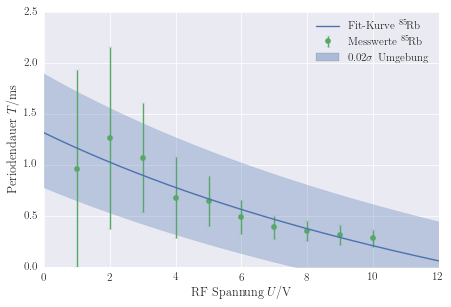

In [327]:
U = np.linspace(0,12,1e03)

T_fit = hyperbolic_fct(U,noms(fit_parameter_P2[0]),noms(fit_parameter_P2[1]),noms(fit_parameter_P2[2]))
a = 0.02
T_fit_upper = hyperbolic_fct(U,noms(fit_parameter_P2[0])+a*stds(fit_parameter_P2[0]),
                             noms(fit_parameter_P2[1])+a*stds(fit_parameter_P2[1]),
                             noms(fit_parameter_P2[2])+a*stds(fit_parameter_P2[2]))
T_fit_lower = hyperbolic_fct(U,noms(fit_parameter_P2[0])-a*stds(fit_parameter_P2[0]),
                             noms(fit_parameter_P2[1])-a*stds(fit_parameter_P2[1]),
                             noms(fit_parameter_P2[2])-a*stds(fit_parameter_P2[2]))

fig,ax = plt.subplots()
ax.set_xlim(0,12)
ax.set_ylim(0,2.5)
ax.set_xlabel(axis_label("RF Spannung",sym="U",unit="V"))
ax.set_ylabel(axis_label("Periodendauer",sym="T",unit="ms"))

line_P2 = ax.errorbar(period_lenghts["RFSpannung V"],noms(period_lenghts["Periodendauer P2"]),
            yerr=stds(period_lenghts["Periodendauer P2"]),label="Messwerte ${}^{85}\!$Rb",
            color=plot_colors[1], marker="o", mec=plot_colors[1], linestyle="")

sigma = ax.fill_between(U,T_fit_upper,T_fit_lower,color=plot_colors[0],alpha=0.3)
ax.bar(0,0,width=0,color=sigma.get_facecolor()[0][:-1],edgecolor="",label=r"0.02$\sigma$ Umgebung",alpha=0.4)

ax.plot(U,T_fit,label="Fit-Kurve ${}^{85}\!$Rb",color=plot_colors[0])


#ax.plot(U,hyperbolic_fct(U,noms(fit_parameter_leftout_P2[0]),noms(fit_parameter_leftout_P2[1]),noms(fit_parameter_leftout_P2[2])),
#       label="Fit-Kurve ${}^{87}\!$Rb",color=lighten_color(line_P2[0].get_color(),-0.2))

ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig(path_graphics+"Transienteneffekt_Rubidium_85.pdf")

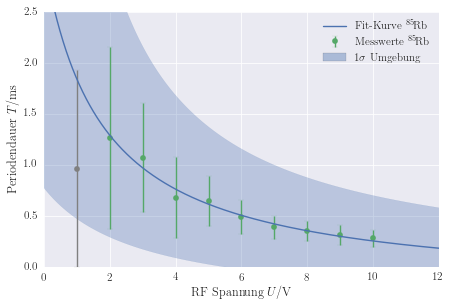

In [328]:
U = np.linspace(0,12,1e03)

T_fit = hyperbolic_fct(U,noms(fit_parameter_leftout_P2[0]),noms(fit_parameter_leftout_P2[1]),
                       noms(fit_parameter_leftout_P2[2]))
a = 1
T_fit_upper = hyperbolic_fct(U,noms(fit_parameter_leftout_P2[0])+a*stds(fit_parameter_leftout_P2[0]),
                             noms(fit_parameter_leftout_P2[1])+a*stds(fit_parameter_leftout_P2[1]),
                             noms(fit_parameter_leftout_P2[2])+a*stds(fit_parameter_leftout_P2[2]))
T_fit_lower = hyperbolic_fct(U,noms(fit_parameter_leftout_P2[0])-a*stds(fit_parameter_leftout_P2[0]),
                             noms(fit_parameter_leftout_P2[1])-a*stds(fit_parameter_leftout_P2[1]),
                             noms(fit_parameter_leftout_P2[2])-a*stds(fit_parameter_leftout_P2[2]))

fig,ax = plt.subplots()
ax.set_xlim(0,12)
ax.set_ylim(0,2.5)
ax.set_xlabel(axis_label("RF Spannung",sym="U",unit="V"))
ax.set_ylabel(axis_label("Periodendauer",sym="T",unit="ms"))

ax.errorbar(period_lenghts["RFSpannung V"][0],noms(period_lenghts["Periodendauer P2"][0]),
            yerr=stds(period_lenghts["Periodendauer P2"][0]),
            color="gray", marker="o", mec="gray", linestyle="")

line_P2 = ax.errorbar(period_lenghts["RFSpannung V"][1:],noms(period_lenghts["Periodendauer P2"][1:]),
            yerr=stds(period_lenghts["Periodendauer P2"][1:]),label="Messwerte ${}^{85}\!$Rb",
            color=plot_colors[1], marker="o", mec=plot_colors[1], linestyle="")

sigma = ax.fill_between(U,T_fit_upper,T_fit_lower,color=plot_colors[0],alpha=0.3)
ax.bar(0,0,width=0,color=sigma.get_facecolor()[0][:-1],edgecolor="",label=r"1$\sigma$ Umgebung",alpha=0.4)

ax.plot(U,T_fit,label="Fit-Kurve ${}^{85}\!$Rb",color=plot_colors[0])

ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig(path_graphics+"Transienteneffekt_Rubidium_85.pdf")

In [171]:

def nuclear_spin(gf,gj):
    B= (2*gf/gj)
    print(B)
    return - ((2*B-1)/(2*B)) + np.sqrt(((2*B-1)/(2*B))**2 - (3/4)*((B-2)/B)), -1/B + np.sqrt((1/B**2) + (1/(2*B)) - 1/4)

In [172]:
nuclear_spin(1/3,2)

0.3333333333333333


(2.5, 0.20156211871642427)